In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# Import Data
data_raw = pd.read_csv("gym_members_exercise_tracking.csv")
data_raw.info()
data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [98]:
### Preprocess Data
data = data_raw.copy()

# dtypes
data['Experience_Level'] = data['Experience_Level'].astype(str)
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype(str)

# Make water intake binary
data['Water_intake_binary'] = (data['Water_Intake (liters)'] > 2).astype(int)
data.drop(columns=["Water_Intake (liters)"],inplace=True)

# change column names and make column names lower case
data.columns = ['Age','Gender','Weight_kg','Height_m','Max_BPM','Avg_BPM','Resting_BPM','Session_Duration_hrs','Calories_Burned','Workout_Type','Fat_Percentage','Water_Intake_lts','Workout_Frequency_days_per_week','Experience_Level','BMI']
data.columns = map(str.lower, data.columns)

# print
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              973 non-null    int64  
 1   gender                           973 non-null    object 
 2   weight_kg                        973 non-null    float64
 3   height_m                         973 non-null    float64
 4   max_bpm                          973 non-null    int64  
 5   avg_bpm                          973 non-null    int64  
 6   resting_bpm                      973 non-null    int64  
 7   session_duration_hrs             973 non-null    float64
 8   calories_burned                  973 non-null    float64
 9   workout_type                     973 non-null    object 
 10  fat_percentage                   973 non-null    float64
 11  water_intake_lts                 973 non-null    object 
 12  workout_frequency_days

In [100]:
numeric_variables = ['age','weight_kg','height_m','max_bpm','avg_bpm','resting_bpm','session_duration_hrs','calories_burned','fat_percentage','water_intake_lts','bmi']

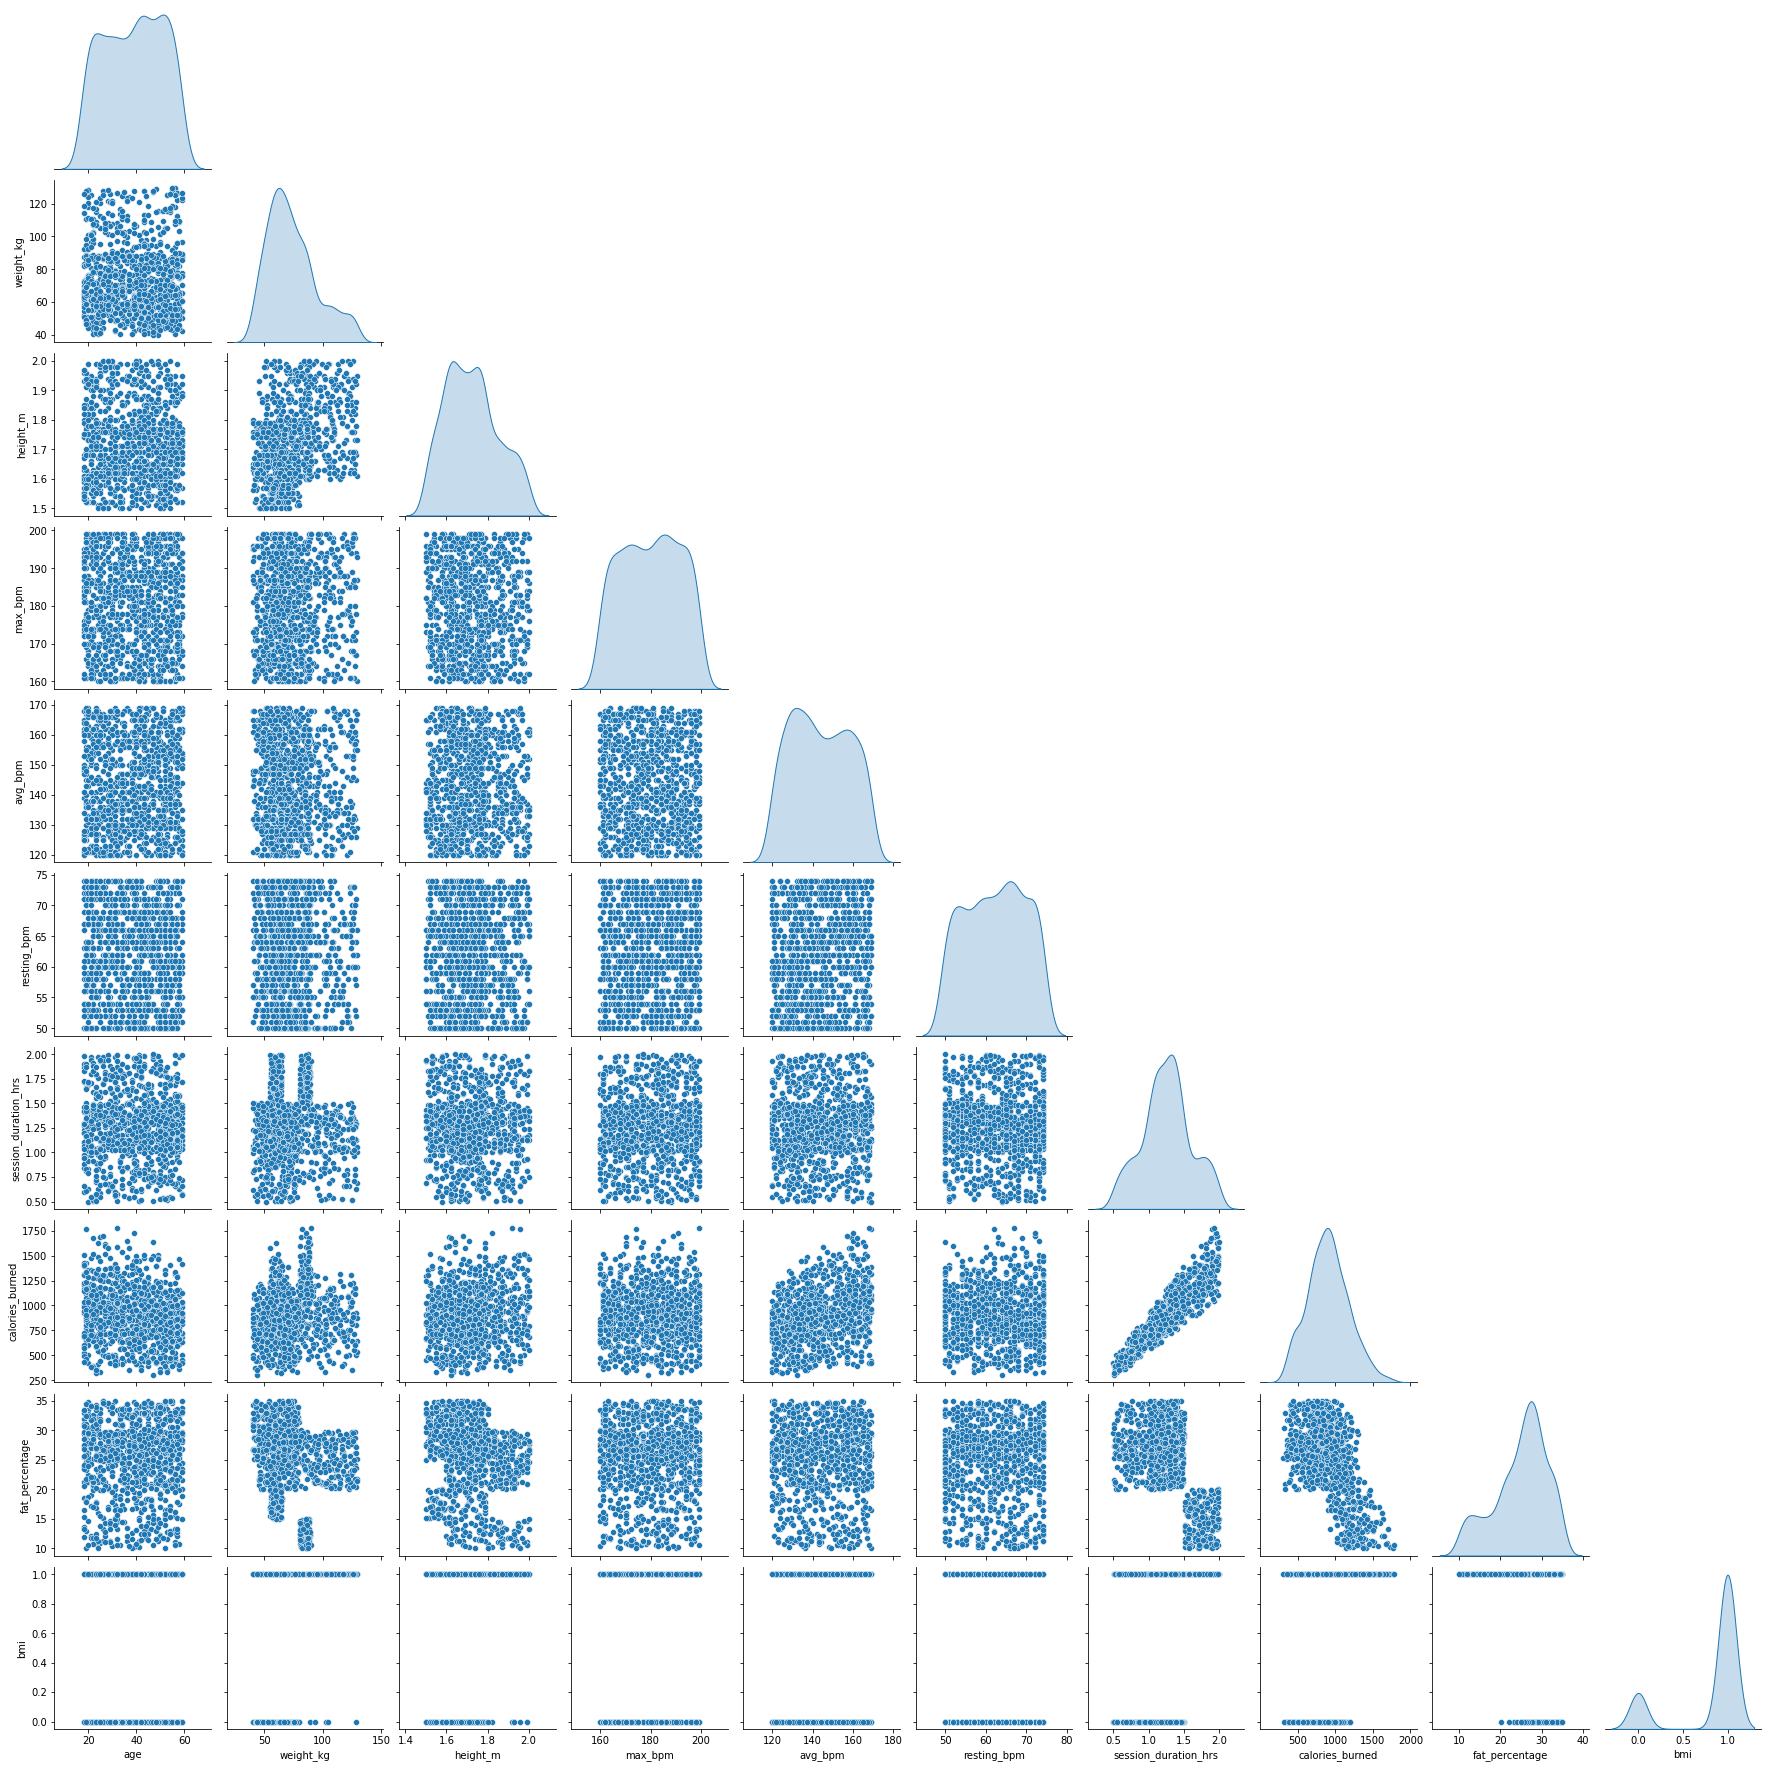

In [101]:
sns.pairplot(data[numeric_variables], diag_kind='kde', corner=True)
plt.show()

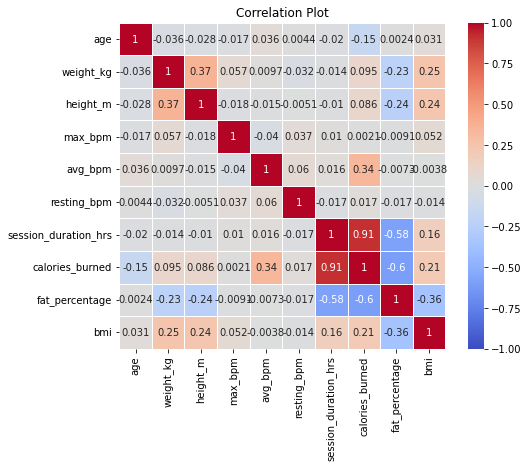

In [102]:
corr_mat = data[numeric_variables].corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

(array([0.03133382, 0.02180834, 0.02080566, 0.02256035, 0.01930163,
        0.02531772, 0.02531772, 0.02481638, 0.02606974, 0.02657108]),
 array([18. , 22.1, 26.2, 30.3, 34.4, 38.5, 42.6, 46.7, 50.8, 54.9, 59. ]),
 <BarContainer object of 10 artists>)

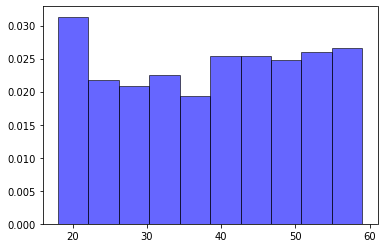

In [ ]:
# TODO: All hist in one plot 
plt.hist(data['age'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.00994596, 0.01714821, 0.02274996, 0.01829142, 0.0133756 ,
        0.01108917, 0.00548743, 0.00468718, 0.00377261, 0.00468718]),
 array([ 40.  ,  48.99,  57.98,  66.97,  75.96,  84.95,  93.94, 102.93,
        111.92, 120.91, 129.9 ]),
 <BarContainer object of 10 artists>)

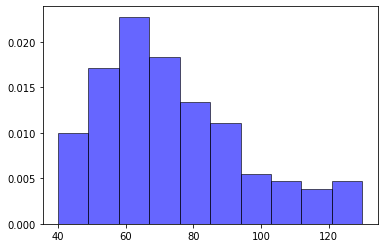

In [104]:
plt.hist(data['weight_kg'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([1.43884892, 1.78828366, 3.24768756, 2.71325797, 2.44604317,
        3.16546763, 1.23329908, 1.45940391, 1.21274409, 1.29496403]),
 array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 10 artists>)

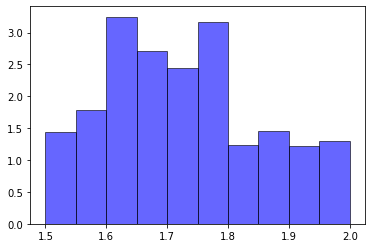

In [105]:
plt.hist(data['height_m'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.02219938, 0.01849949, 0.01891059, 0.01849949, 0.04110997,
        0.04316547, 0.07605344, 0.08098664, 0.03658787, 0.04398767]),
 array([10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ]),
 <BarContainer object of 10 artists>)

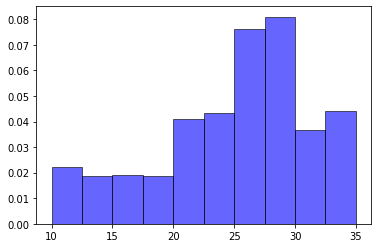

In [106]:
plt.hist(data['fat_percentage'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([1.04830421, 0.        , 0.        , 1.26070572, 0.        ,
        0.        , 0.34943474, 0.        , 0.        , 0.67488866]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

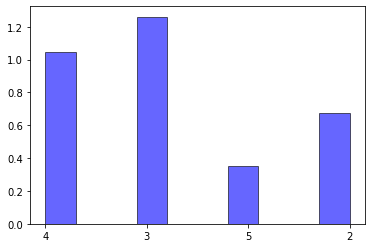

In [107]:
plt.hist(data['water_intake_lts'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.32202809, 0.39739637, 0.43850634, 0.91127098, 1.11682083,
        1.36348064, 0.91127098, 0.3562864 , 0.43850634, 0.41109969]),
 array([0.5 , 0.65, 0.8 , 0.95, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.85, 2.  ]),
 <BarContainer object of 10 artists>)

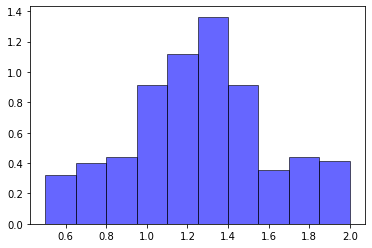

In [108]:
plt.hist(data['session_duration_hrs'],density=True,alpha=0.6,color='b',edgecolor="black")